### Kaggle data fetch 

In [1]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('olistbr/brazilian-ecommerce',
path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


### Make individual Dataframe

In [2]:

import pandas as pd

customers = pd.read_csv(r"data/olist_customers_dataset.csv")
geolocation = pd.read_csv(r"data/olist_geolocation_dataset.csv")
order_items = pd.read_csv(r"data/olist_order_items_dataset.csv")
order_payments = pd.read_csv(r"data/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv(r"data/olist_order_reviews_dataset.csv")
orders = pd.read_csv(r"data/olist_orders_dataset.csv")
products = pd.read_csv(r"data/olist_products_dataset.csv")
sellers = pd.read_csv(r"data/olist_sellers_dataset.csv")
category_translation = pd.read_csv(r"data/product_category_name_translation.csv")

### Merge individual df from common column

In [3]:
# Merge customers with orders
df = orders.merge(customers, on="customer_id", how="left")

# Merge order payments
df = df.merge(order_payments, on="order_id", how="left")

# Merge order reviews
df = df.merge(order_reviews, on="order_id", how="left")

# Merge order items
df = df.merge(order_items, on="order_id", how="left")

# Merge products
df = df.merge(products, on="product_id", how="left")

# Merge product category translations
df = df.merge(category_translation, on="product_category_name", how="left")

# # Merge sellers
df = df.merge(sellers, on="seller_id", how="left")

# # Merge geolocation using customer and seller zip codes
# df = df.merge(geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left", suffixes=("_customer", "_geo"))
# df = df.merge(geolocation, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left", suffixes=("_geo", "_seller"))


### Check For Null or Missing Values

In [4]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
order_item_id                       833
product_id                          833
seller_id                           833


In [5]:
df.dtypes
df.shape

(119143, 40)

### Removing Duplicates

In [6]:
df.drop_duplicates(inplace=True)


### Handling Missing Values in Each Columns

In [7]:


# Unknown Values help us to see proportional error
#df[['payment_type', 'product_category_name', 'product_category_name_english']] = \
df[['payment_type', 'product_category_name', 'product_category_name_english']].fillna("Unknown")


# Renaming mispelled column names
df = df.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
})


# dropping remaining records containing null value ,which is less than 5%  records
df=df.dropna()

### To Find Dimension 

In [8]:
#df.isna().sum()
df.shape

(11578, 40)

In [9]:
pd.set_option('display.max_columns', None)
df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
119053,c7510fe2bce3ab54854dc588ce4d187c,f74562da630b57572d1742ba2f28b662,delivered,2018-05-16 09:05:27,2018-05-17 09:18:23,2018-05-18 14:23:00,2018-05-22 14:20:48,2018-06-21 00:00:00,5112d7286a328a07d06a8051c3c55410,21616,rio de janeiro,RJ,1.0,credit_card,4.0,220.12,bbe7c6000965c0d7b0a0fbd9c9fa7b24,5.0,excelente,"nota 1000 , Gostei muito do produto , material...",2018-05-23 00:00:00,2018-05-26 13:43:20,1.0,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,2018-05-23 09:18:23,199.00,21.12,cool_stuff,48.0,330.0,1.0,1950.0,33.0,44.0,19.0,cool_stuff,95780.0,montenegro,RS
119063,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03 00:00:00,7a22d14aa3c3599238509ddca4b93b01,5863,sao paulo,SP,1.0,credit_card,7.0,73.10,7a11bf826668febba0800ec35884958c,1.0,Muito frágil !!!,"Achei o produto muito pequeno e onde fica a ""t...",2018-08-31 00:00:00,2018-09-21 13:54:38,1.0,777798445efd625458a90c13f3b3e6e7,5f2684dab12e59f83bef73ae57724e45,2018-08-31 12:35:17,63.90,9.20,brinquedos,52.0,711.0,2.0,1500.0,28.0,22.0,18.0,toys,5125.0,sao paulo,SP
119071,a6bd1f93b7ff72cc348ca07f38ec4bee,6d63fa86bd2f62908ad328325799152f,delivered,2018-04-20 17:28:40,2018-04-24 19:26:10,2018-04-23 17:18:40,2018-04-28 17:38:42,2018-05-15 00:00:00,9108b540419f20edc605468f3966813b,15093,sao jose do rio preto,SP,1.0,credit_card,3.0,77.23,eb4c94cf604d9cf4d4442890ac33797d,5.0,recomendo,Foi tudo dentro do esperado!!!,2018-04-29 00:00:00,2018-05-07 13:31:59,1.0,c045b19fdb30a3035c56d04c6fe2e622,259f7b5e6e482c230e5bfaa670b6bb8f,2018-04-26 18:30:38,59.90,17.33,cama_mesa_banho,48.0,641.0,3.0,2050.0,50.0,10.0,40.0,bed_bath_table,8550.0,poa,SP
119090,5597332b7eded552f104108f22b023e4,aaa423fb52f4106f477683490cbd5845,delivered,2018-08-15 13:03:37,2018-08-15 13:15:22,2018-08-15 14:37:00,2018-08-17 16:06:37,2018-08-21 00:00:00,8a898880a61e551c80bacadfb4356255,6449,barueri,SP,1.0,credit_card,1.0,36.46,c44004d7e60dc281ebd5361b717570c3,5.0,Ótima,Muito bom produto,2018-08-18 00:00:00,2018-08-19 13:24:27,1.0,6db72cc3d861dbea370e6959aa850b8c,31561f325664a8a7aba4c8d0c3a9b3db,2018-08-20 13:15:22,27.49,8.97,utilidades_domesticas,58.0,682.0,2.0,340.0,30.0,6.0,11.0,housewares,3287.0,sao paulo,SP
119124,19dba6d1e58b04e7fc820558a38ea398,cf97e9cf454480b303de6736ddd15fd6,delivered,2018-05-12 13:42:24,2018-05-12 13:55:17,2018-05-16 08:14:00,2018-05-18 17:18:29,2018-06-04 00:00:00,9e4accf95024aa6565ca1efcadb96752,8550,poa,SP,1.0,credit_card,1.0,104.79,d842b3001e953f4ca2a3a312d02523f9,5.0,Bom.maravilha,Tudo em.ordem.e rápido a entrega.chegou bem.va...,2018-05-19 00:00:00,2018-05-20 16:27:34,1.0,0a57f7d2c983bcf8188589a5fea4a8da,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-17 13:55:17,96.00,8.79,relogios_presentes,33.0,932.0,1.0,396.0,18.0,11.0,14.0,watches_gifts,14840.0,guariba,SP


## Create A Star Schema from all the columns in df 

### Dimension Table

In [10]:
# Customers Table
dim_customers = df[["customer_id", "customer_unique_id", "customer_zip_code_prefix", "customer_city", "customer_state"]].drop_duplicates().copy()

# Sellers Table
dim_sellers = df[["seller_id", "seller_zip_code_prefix", "seller_city", "seller_state"]].drop_duplicates().copy()

# Products Table
dim_products = df[[
    "product_id", "product_category_name", "product_category_name_english",
    "product_name_length", "product_description_length", "product_photos_qty",
    "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"
]].drop_duplicates().copy()
# Payment Types Table
dim_payment_types = df[["payment_type"]].drop_duplicates().reset_index(drop=True)
dim_payment_types["payment_type_id"] = dim_payment_types.index.astype(str)

# Reviews Table
dim_reviews = df[["review_id", "order_id", "review_score"]].drop_duplicates().copy()


### Fact Table

In [11]:
fact_orders = df[[
    "order_id", "customer_id", "seller_id", "product_id", "order_status",
    "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
    "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date",
    "payment_installments", "payment_value", "price", "freight_value", "payment_type"  # Add this column
]].copy()



In [12]:
fact_orders.head()
# fact_orders.shape

,order_id,customer_id,seller_id,product_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_installments,payment_value,price,freight_value,payment_type
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,1.0,141.46,118.7,22.76,boleto
19,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,89a51f50b8095ea78d5768f34c13a76f,009c09f439988bc06a93d6b8186dce73,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,2018-06-18 18:59:02,10.0,146.45,132.4,14.05,credit_card
30,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,55c26bcb609f480eb7868594245febb5,e99d69efe684efaa643f99805f7c81bc,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17 00:00:00,2018-08-14 03:24:51,1.0,104.11,89.9,14.21,boleto
32,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,977f9f63dd360c2a32ece2f93ad6d306,d70f38e7f79c630f8ea00c993897042c,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,2018-06-13 00:35:10,10.0,227.68,90.9,48.64,credit_card
33,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,d673a59aac7a70d8b01e6902bf090a11,9451e630d725c4bb7a5a206b48b99486,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,2018-06-13 00:35:10,10.0,227.68,39.5,48.64,credit_card


In [13]:
# Merge fact_orders with dim_payment_types using payment_type
# as there are only few categories of paymment types ,we are assigning them unique int id
fact_orders = fact_orders.merge(dim_payment_types, on="payment_type", how="left").drop(columns=["payment_type"])


In [14]:
fact_orders.head()
# fact_orders.shape

,order_id,customer_id,seller_id,product_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_installments,payment_value,price,freight_value,payment_type_id
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,1.0,141.46,118.7,22.76,0
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,89a51f50b8095ea78d5768f34c13a76f,009c09f439988bc06a93d6b8186dce73,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,2018-06-18 18:59:02,10.0,146.45,132.4,14.05,1
2,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,55c26bcb609f480eb7868594245febb5,e99d69efe684efaa643f99805f7c81bc,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17 00:00:00,2018-08-14 03:24:51,1.0,104.11,89.9,14.21,0
3,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,977f9f63dd360c2a32ece2f93ad6d306,d70f38e7f79c630f8ea00c993897042c,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,2018-06-13 00:35:10,10.0,227.68,90.9,48.64,1
4,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,d673a59aac7a70d8b01e6902bf090a11,9451e630d725c4bb7a5a206b48b99486,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,2018-06-13 00:35:10,10.0,227.68,39.5,48.64,1


In [15]:
# df.to_csv("merged_cleaned.csv")

## Visualization

###  Visualizing Sales Performance Over Time


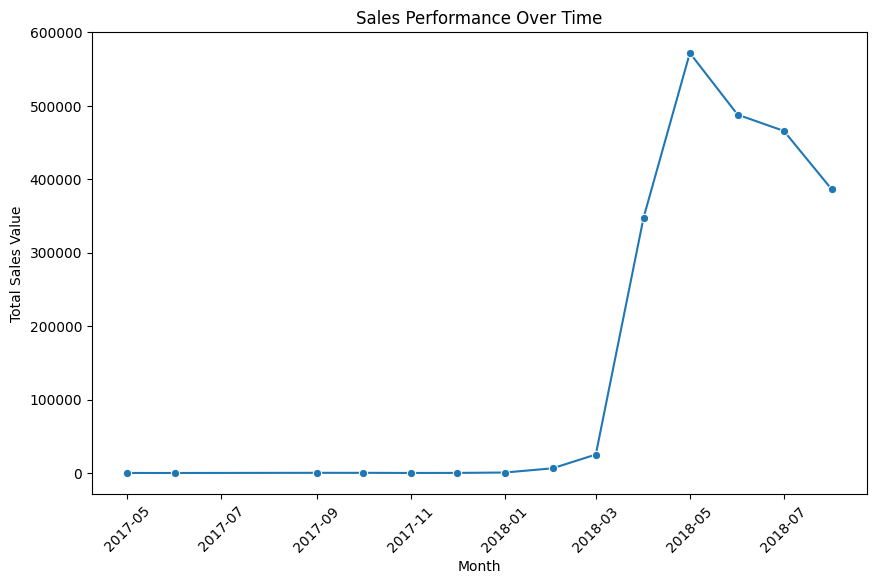

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the 'order_purchase_timestamp' to datetime if not already done
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Aggregate sales by month
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

# Ensure that the payment_value is numeric
df['payment_value'] = pd.to_numeric(df['payment_value'], errors='coerce')

# Remove rows where 'payment_value' is NaN (optional)
df = df.dropna(subset=['payment_value'])

# Aggregate total sales by month
monthly_sales = df.groupby('order_month')['payment_value'].sum().reset_index()

# Convert 'order_month' to datetime type for plotting
monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()

# Plot Monthly Sales
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_month', y='payment_value', data=monthly_sales, marker='o')
plt.title('Sales Performance Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()


### Visualizing Sales by Product Category


C:\Users\91639\AppData\Local\Temp\ipykernel_18268\1557964132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_value', y='product_category_name', data=category_sales, palette='viridis')


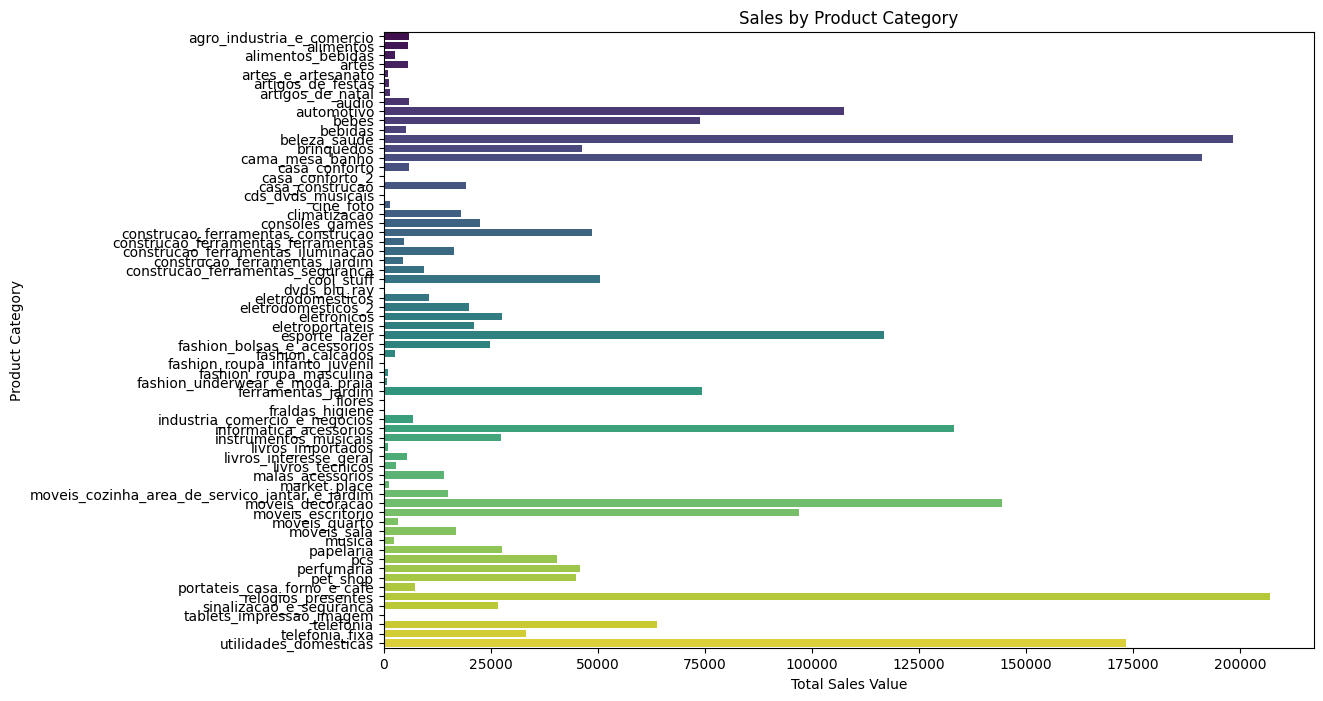

In [17]:
# Aggregate sales by product category
category_sales = df.groupby('product_category_name')['payment_value'].sum().reset_index()

# Plot Sales by Product Category
plt.figure(figsize=(12, 8))
sns.barplot(x='payment_value', y='product_category_name', data=category_sales, palette='viridis')
plt.title('Sales by Product Category')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Category')
plt.show()


### Top 10 Most Sold Products

### Visualizing Order Status Distribution

C:\Users\91639\AppData\Local\Temp\ipykernel_20624\1269611330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_status', data=orders, palette='viridis')


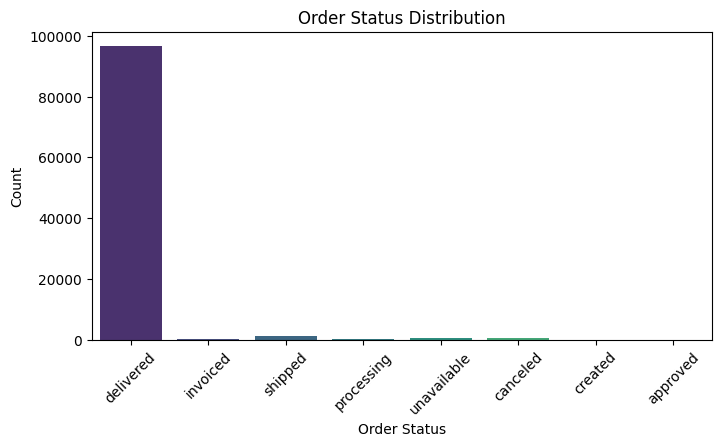

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(x='order_status', data=orders, palette='viridis')
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Push Pandas DataFrame to BigQuery as Defined Star schema

In [18]:
import pandas as pd
from google.cloud import bigquery
from pandas_gbq import to_gbq


In [19]:
import os
from google.cloud import bigquery


#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/suman/AppData/Roaming/gcloud/application_default_credentials.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/91639/Desktop/Multi retail/GCA.json"

#project_id = "brazilian-ecom"
project_id = "e-commerce-454200"


# Create BigQuery client
client = bigquery.Client(project=project_id)

print(f"Connected to BigQuery project: {project_id}")


Connected to BigQuery project: e-commerce-454200


In [26]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('olistbr/brazilian-ecommerce',
path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


In [20]:
import os
from google.cloud import bigquery

#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"C:\Users\suman\AppData\Roaming\gcloud\application_default_credentials.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/91639/Desktop/Multi retail/GCA.json"


#project_id = "brazilian-"
project_id = "e-commerce-454200"
dataset_id = "MULTI_RETAIL"

# Set up BigQuery Client
client = bigquery.Client(project=project_id)

# Function to push DataFrame to BigQuery
def upload_to_bigquery(df, table_name):
    table_ref = f"{project_id}.{dataset_id}.{table_name}"
    
    # Load DataFrame into BigQuery
    job = client.load_table_from_dataframe(df, table_ref)
    job.result()  # Wait for completion
    print(f"Uploaded {table_name} to BigQuery.")

# Upload DataFrames
upload_to_bigquery(fact_orders, "fact_orders")
upload_to_bigquery(dim_customers, "dim_customers")
upload_to_bigquery(dim_sellers, "dim_sellers")
upload_to_bigquery(dim_products, "dim_products")
upload_to_bigquery(dim_payment_types, "dim_payment_types")
upload_to_bigquery(dim_reviews, "dim_reviews")

print("All tables uploaded successfully!")


NotFound: 404 POST https://bigquery.googleapis.com/upload/bigquery/v2/projects/e-commerce-454200/jobs?uploadType=multipart: Not found: Dataset e-commerce-454200:MULTI_RETAIL